In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#calculate modularity
def mod(sets, G):
    #number of links in network
    L = G.number_of_edges()
    mod = 0
    #loop through each community
    for x in sets:
        edges_in_set = 0
        degrees_in_set = 0
        for i in x:
            degrees_in_set += G.degree(i) #degree of current node
            for j in x:
                edges_in_set += (G.number_of_edges(i,j)) #number of edges between current 2 nodes
        mod += ((edges_in_set/2)/L) - ((degrees_in_set/(2*L))**2)
    return mod

## Kernighan-Lin

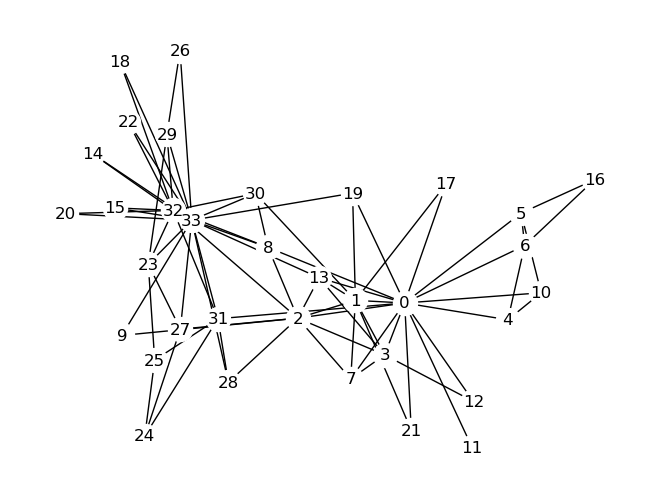

In [3]:
# Generate a karate club network
G1 = nx.karate_club_graph()
nx.draw_spring(G1, with_labels=True, node_color='w')

In [4]:
def cal_cost(node, node_list, G):
    cost = 0
    for i in node_list:
        cost = cost + G.number_of_edges(i, node)
    return cost

def d_value(node, part1, part2, G):
    d = 0
    if node in part1:
        internal_cost = cal_cost(node, part1, G)
        external_cost = cal_cost(node, part2, G)
    else:
        internal_cost = cal_cost(node, part2, G)
        external_cost = cal_cost(node, part1, G)
    d = external_cost - internal_cost
    return d

def cal_gain(node1,node2, part1, part2, G):
    d1 = d_value(node1, part1, part2, G)
    d2 = d_value(node2, part1, part2, G)
    gain = d1 + d2 - 2*G.number_of_edges(node1,node2)
    return gain

def swap_nodes(node1, node2, part1, part2):
    if(node1 in part1) and (node2 in part2):
        part1.remove(node1)
        part2.remove(node2)
        part1.append(node2)
        part2.append(node1)
    elif (node1 in part2) and (node2 in part1):
        part1.remove(node2)
        part2.remove(node1)
        part1.append(node1)
        part2.append(node2)
    else:
        print("Wrong! Two nodes in same set")
    return set1, set2

In [5]:
#Kernighan-Lin

#initial setup
set1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
set2 = [17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]

node_set = set1+set2
activate_set1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
activate_set2 = [17, 18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
activate_node_set = activate_set1 + activate_set2

#calculate cut cost before the iteration
cut_cost = 0
for i in set1:
    for j in set2:
        cut_cost = cut_cost + G1.number_of_edges(i,j)
        
cut_cost_old = 1000

print(set1, set2)
print("Cut cost is:", cut_cost)

while len(activate_node_set) >1:
    print("----------------") #to visualize separation of each step
    
    #calculate the gain
    gain_dict = {}
    for v1 in activate_set1:
        for v2 in activate_set2:
            gain_dict[(v1,v2)] = cal_gain(v1, v2, set1, set2, G1)
            
    #find the pair of nodes with highest g
    swap_node1, swap_node2 = max(gain_dict, key = gain_dict.get)
    
    cut_reduction = max(gain_dict.values())
    cut_cost = cut_cost - cut_reduction
    
    if cut_cost <= cut_cost_old:
    
        #swap nodes and update set
        set1, set2 = swap_nodes(swap_node1, swap_node2, set1, set2)
        print(set1, set2) 
        print("Cost reduction is:", cut_reduction)
        print("Cut cost is: ", cut_cost)
    
        #activate node set
        activate_set1.remove(swap_node1)
        activate_set2.remove(swap_node2)
        activate_node_set = activate_set1 + activate_set2
    
        cut_cost_old = cut_cost
        
    else:
        all_sets = [set1, set2]
        print("Modularity: ", mod(all_sets, G1))
        break

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Cut cost is: 20
----------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17] [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 14]
Cost reduction is: 4
Cut cost is:  16
----------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 21] [18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 14, 15]
Cost reduction is: 4
Cut cost is:  12
----------------
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 21, 19] [18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 14, 15, 8]
Cost reduction is: 2
Cut cost is:  10
----------------
Modularity:  0.3717948717948718


In [6]:
print("KERNIGHAN-LIN ANSWERS")
print("Modularity: 0.3717948717948718")
print("Communities:")
print([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 21, 19])
print([18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 14, 15, 8])

KERNIGHAN-LIN ANSWERS
Modularity: 0.3717948717948718
Communities:
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 21, 19]
[18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 14, 15, 8]


## Girvan-Newman

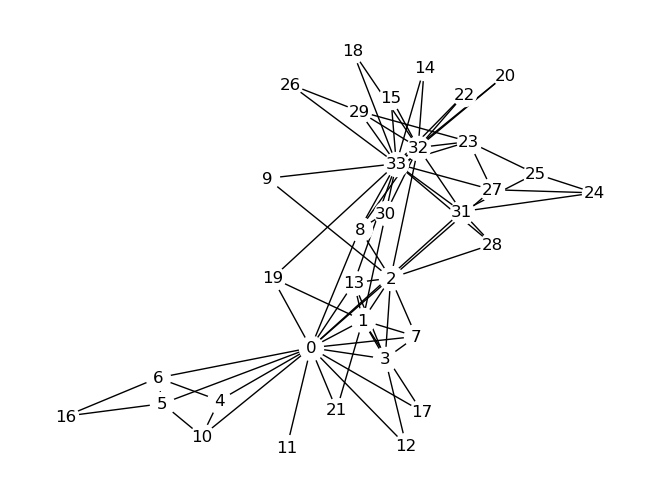

In [7]:
G2 = nx.karate_club_graph()
nx.draw_spring(G2, with_labels=True, node_color='w')

G2_clean = nx.karate_club_graph()

In [8]:
#given a source node, returns a set of all the nodes it can visit (the community the node is in)
def community(G, node):
    #nodes that the source node is able to visit
    comm = set()
    
    #will check if these nodes are connected to the source
    check = set()
    #these are connected to the nodes in check and should be checked next
    check_next = set()
    check_next.add(node) #put source node as first to be analyzed
    
    while len(check_next) > 0:
        check = check_next #set nodes being checked to the new set
        check_next = set() #reset the ones that will be checked next iteration
        
        for i in check:
            if i not in comm:
                comm.add(i)
                #the next nodes to be checked are the neighbors of the node just added
                check_next.update(G.neighbors(i))
    return comm
        

#find all communities in a graph
def all_communities(G):
    #list of communities, to be filled
    communities = []
    #track the nodes that have already been visited
    visited = set()
    
    for i in G:
        if i not in visited:
            #find the community that node i is in
            i_comm = community(G, i)
            #add all nodes in this community to the list of visited nodes
            visited.update(i_comm)
            #add this community to the list of communities
            communities.append(i_comm)
    
    return communities

In [9]:
num_edges = G2.number_of_edges()
num_comms = 1
mods = []
all_comms = []

#go through betweenness values, find max, remove
for i in range(num_edges-1):
    #dictionary of remaining edges and their betweenness values
    btw = nx.edge_betweenness_centrality(G2)
    
    #pulls betweenness values from dictionary
    btw_vals = list(btw.values())
    #finds the max value of betweenness
    max_btw = max(btw_vals)
    #find the location of the max, if multiple will find the first one
    index_max = btw_vals.index(max_btw)
    #get key at max (node pair defining the edge)
    keys = list(btw.keys())
    key_max = keys[index_max]
    
    
    #remove the edge with the max betweenness
    G2.remove_edge(key_max[0], key_max[1])
    #get list of nodes in each community in the graph with newly removed edges
    comms = all_communities(G2)
    print(comms) #print the communities each time an edge is removed
    all_comms.append(comms)
    
    #check if the removed edge created a new community (split)
    if len(comms) > num_comms:
        num_comms = len(comms)
        #if a new community was created, calculate the modularity
        current_mod = mod(comms, G2_clean)
        mods.append(current_mod)
        print("--------------")
        print("Modularity:", current_mod)
        print("--------------")

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2

In [10]:
#print answer    
max_com = mods.index(max(mods))
print("GIRVAN-NEWMAN ANSWERS")
print("Modularity: 0.40129848783694944")
print("Communities:")
print([0, 1, 3, 7, 12, 13, 17, 19, 21])
print([2, 24, 25, 27, 28, 31])
print([4, 5, 6, 10, 16])
print([32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30])
print([9])
print([11])

GIRVAN-NEWMAN ANSWERS
Modularity: 0.40129848783694944
Communities:
[0, 1, 3, 7, 12, 13, 17, 19, 21]
[2, 24, 25, 27, 28, 31]
[4, 5, 6, 10, 16]
[32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30]
[9]
[11]


## Ravasz

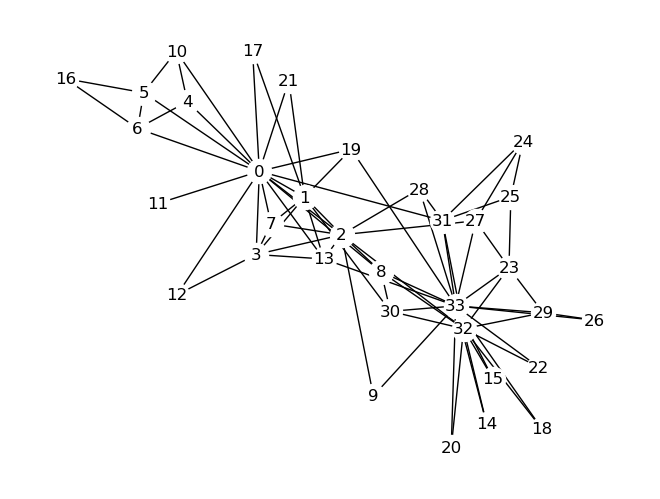

In [11]:
G3 = nx.karate_club_graph()
nx.draw_spring(G3, with_labels=True, node_color='w')

In [12]:
#calculate jaccard similarity of 1 node pair
def nodeJaccard(node1, node2, G):
    nbrs1 = list(G.neighbors(node1))
    nbrs2 = list(G.neighbors(node2))
    
    intersection = len(list(set(nbrs1).intersection(set(nbrs2)))) #number in intersection
    union = len(list(set(nbrs1).union(set(nbrs2)))) #number in union
    j_val = intersection / union
    
    return j_val


#calculate the jaccard similarity for every community pair
def commJaccard(community_set, G):
    #list of community pairs
    comm_pairs = []
    #list of similarity of each community pair
    all_j = []

    for s1 in range(0, len(community_set)): #set 1
        set1 = community_set[s1]
        for s2 in range(s1+1, len(community_set)): #set 2
            set2 = community_set[s2]
            #record j values for node pairs in the 2 communities
            j_vals = []
            for n1 in range(0, len(set1)): #loop through nodes in set 1
                for n2 in range(0, len(set2)): #loop through nodes in set 2
                    #jaccard similarity of current node pair
                    pair_j_val = nodeJaccard(set1[n1], set2[n2], G)
                    #add jaccard similarity of current node pair to list for the current communities (set1 & set2)
                    j_vals.append(pair_j_val)
            comm_pairs.append([set1,set2])
            #calc group similarity: average linkage clustering
            avg_j = sum(j_vals)/(len(set2)*len(set1))
            #add group similarity to list of all similarities
            all_j.append(avg_j)

    return [all_j, comm_pairs]

#get 2 communities as 1 list
def combineCommunities(comm1, comm2):
    combined = []
    for elem1 in comm1:
        combined.append(elem1)
    for elem2 in comm2:
        combined.append(elem2)
        
    return combined

#add combined community to list and remove individual communities
def updateCommunities(combined_comms, com_list, comm1, comm2):
    com_list.append(combined_comms)
    com_list.remove(com_list[com_list.index(comm1)])
    com_list.remove(com_list[com_list.index(comm2)])
    
    return com_list

#format list defined as to combine
def toCombine(listx):
    new_list = [[s] for s in listx if isinstance(s, int)]
    if len(new_list) == 0:
        new_list = listx
    
    return new_list

In [13]:
#initialize community list as all nodes separated
r_comms =  [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33]]
ravasz_mods = []
community_steps = []

while len(r_comms) > 1:
    #calculate jaccard similarity for every commmunity pair 
    jaccard_values = commJaccard(r_comms, G3)
    #find index of max
    max_index = jaccard_values[0].index(max(jaccard_values[0]))
    print("index",max_index)
    
    
    #get community pair with highest jaccard value
    to_combine = toCombine(jaccard_values[1][max_index])
    print("to combine", to_combine)
    #get first community to combine
    comm1 = to_combine[0]
    #get second community to combine
    comm2 = to_combine[1]
    
    #combine communities
    combined = combineCommunities(comm1, comm2)
    #update community list
    updateCommunities(combined, r_comms, comm1, comm2)
    community_steps.append(r_comms)
    
    #calculate modularity of the graph
    r_mod = mod(r_comms, G3)
    print("Modularity:", r_mod)
    ravasz_mods.append(r_mod)
        
    print("Communities", r_comms)
    print("----")


index 371
to combine [[14], [15]]
Modularity: -0.05013149243918473
Communities [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [14, 15]]
----
index 378
to combine [[17], [21]]
Modularity: -0.050460223537146597
Communities [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [16], [18], [19], [20], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [14, 15], [17, 21]]
----
index 361
to combine [[18], [20]]
Modularity: -0.05078895463510846
Communities [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [16], [19], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [14, 15], [17, 21], [18, 20]]
----
index 371
to combine [[22], [14, 15]]
Modularity: -0.051446416831032196
Communities [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [16], [19], [23

In [14]:
#print answer    
max_comm = ravasz_mods.index(max(ravasz_mods))
print("RAVASZ ANSWERS")
print("Modularity: 0.37146614069691")
print("Communities:")
print([6, 10, 16, 4, 5, 11, 12, 7, 13, 19, 17, 21, 0, 1, 2, 3])
print([27, 9, 28, 23, 26, 30, 29, 18, 20, 22, 14, 15, 8, 31, 32, 33, 24, 25])

RAVASZ ANSWERS
Modularity: 0.37146614069691
Communities:
[6, 10, 16, 4, 5, 11, 12, 7, 13, 19, 17, 21, 0, 1, 2, 3]
[27, 9, 28, 23, 26, 30, 29, 18, 20, 22, 14, 15, 8, 31, 32, 33, 24, 25]


### Comparison

KERNIGHAN-LIN ANSWERS
Modularity: 0.3717948717948718
Communities: ([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 21, 19], [18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 14, 15, 8])


GIRVAN-NEWMAN
Modularity: 0.40129848783694944
Communities: ([0, 1, 3, 7, 12, 13, 17, 19, 21], [2, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16], [32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30], [9], [11])


RAVASZ ANSWERS
Modularity: 0.37146614069691
Communities: ([6, 10, 16, 4, 5, 11, 12, 7, 13, 19, 17, 21, 0, 1, 2, 3], [27, 9, 28, 23, 26, 30, 29, 18, 20, 22, 14, 15, 8, 31, 32, 33, 24, 25])


The final sets for the kernighan-lin and ravasz similarities are almost identical except for one node. Thus, it also makes sense that the modularities for these two are almost the exact same as well. On the other hand, the girvan newman method returned more communities, and for this reason the modularity is slightly higher and different from the other two methods. 

It makes sense that the ravasz would return less communities because it is an agglomerative method, so builds the set from individual nodes into larger communities. This returns a similar result to kernighan-lin because kernighan-lin is predefined as containing two communities and nodes are just swapped between them. However, girvan-newman starts with the full graph and breaks it apart into separate communities, which is why the maximum modularity occurs when more communities are created. 